# Plotting vibrational wavefunctions

Testing this for Fi

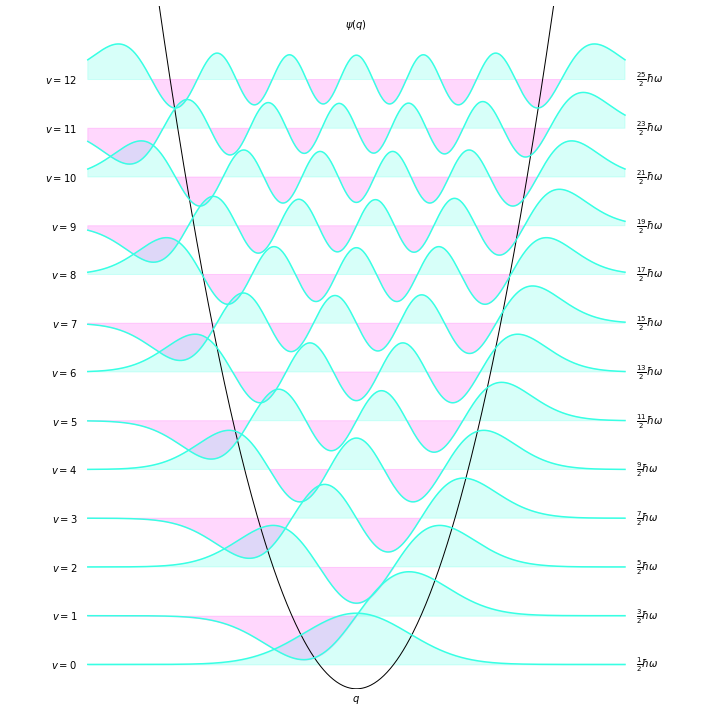

In [4]:
# From https://scipython.com/blog/the-harmonic-oscillator-wavefunctions/

import numpy as np
from matplotlib import rc
#from scipy.misc import factorial
import matplotlib.pyplot as plt
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
#rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False #FIONA: Edit to change from prob to wavefunctions

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 12 #FIONA: Edit to change number of levels

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
#COLOUR1 = (0.6196, 0.0039, 0.2588, 1.0)
COLOUR1 = (56/255, 255/255, 228/255, 1) #FIONA: Use your colours here
COLOUR2 = (255/255, 56/255, 248/255, 1)

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*np.math.factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, q):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    return N(v)*Hr[v](q)*np.exp(-q*q/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(q):
    """Return potential energy on scaled oscillator displacement grid q."""
    return q**2 / 2


fig, ax = plt.subplots(figsize=(10,10))
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin, qmax, 500)
V = get_potential(q)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve above the offset is filled with COLOUR1; the curve below is
    filled with COLOUR2.

    """
    ax.plot(q, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.2)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR2, alpha=0.2)

# Plot the potential, V(q).
ax.plot(q, V, color='k', linewidth=1)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, q)
    E_v = get_E(v)/2 # FIONA: Edit this one for energy level separation
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # The energy, E = (v+0.5).hbar.omega.
    ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*v+1), x=qmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$v={}$'.format(v), x=qmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(q)|^2$'
else:
    ylabel = r'$\psi(q)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$q$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 7)
#ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

plt.savefig('sho-psi{}-{}.png'.format(PLOT_PROB+1, VMAX),transparent=True) #FIONA: Edit this for filename export
plt.show()

In [28]:
ymax

7.0